## Nivell 1

- Exercici 1

Agafa un conjunt de dades de tema X que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 


> El tema escollit en aquest cas està conformat per els datasets oficials de Queixes/Suggeriments/Agraïments recollits per l'ajuntament de barcelona del 2018 al 2022. 

> En aquest dataset hi figuren les columnes:
        
  - Fitxa ID: codi d'identificació de la petició ciutadana.
  - Tipus de petició:
        1. Incidències: comunicacions d'un fet o irregularitat localitzat en un espai i temps concret que requereix una actuació. Aquesta irregularitat afecta a un element del mobiliari urbà o a un servei o nivell de servei ofert i establert per part de l’Ajuntament de Barcelona.
        2. Queixes: comunicacions d’una disconformitat o d'una insatisfacció relativa a unes expectatives que no han estat satisfetes o a una situació prolongada en el temps.
        3. Suggeriments: idees o propostes per a la millora d’algun aspecte de la ciutat o servei municipal.
        4. Consultes: demandes d'informació sobre la ciutat o els serveis municipals.
        5. Agraïments: reconeixements d’un bon funcionament dels serveis municipals
        6. Petició de servei: servei municipal del catàleg de serveis de l’Ajntament que es gestiona mitjançant el mateix sistema que les incidències, queixes i suggeriments.

  - Àrea, Element i Detall: classificació temàtica interna de les peticions de la ciutadania per a la seva gestió:
        1. Àrea: classificació conceptual de temes de la ciutat o del funcionament dels serveis públics municipals.
        2. Element: en general, concepte o objecte afectat en la petició expressada.
        3. Detall: en general, problema o incidència concret de l’element.

  - Dia, mes i any d'alta o entrada de la petició.
  
  - Dia, mes i any de tancament o finalització de la gestió efectuada per l'Ajuntament en relació a la petició.
  
  - Per a peticions amb ubicació s'indica el barri (i el codi de barri) el districte (i el codi de districte), la secció censal, el tipus i nom de la via, el número i les coordenades de geolocalització (ETRS89 i WGS84).
  
  - Suport: canal d'entrada de la petició.
  
  - Canal de resposta escollit pel ciutadà/na per rebre la resposta a la petició. Particularitats:
        1. Immediata: peticions que, pel compromís de servei o resolució que tenen assignat, es donen per respostes informant al ciutadà/na del termini de resolució en el moment d'efectuar la petició. El ciutadà/na no rep una resposta específica.
        2. No vol resposta: el ciutadà/na no desitja resposta a la comunicació efectuada.


> Per a mes info o detall sobre el dataset i les seves variables:
    https://opendata-ajuntament.barcelona.cat/data/es/dataset/iris
    
> Com a principal diferencia amb un dataset d'esports, la majoria d'atributs que tenim en aquest dataset no són numèrics, exceptuant només els formats de temps (i.e: Date/year/month/ID) i el de "codi_barri" , tot i això, creiem ja serà suficient per a realitzar el que es demana en els exercicis d'aquest Sprint, oferint a més una hipòtesis i la seva contrastació (

In [1]:
import csv
import re
import statistics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sb


%matplotlib inline

queixes_2022 = pd.read_csv('C:\\Users\\motxi\\Documents\\Data_Science_IT_Academy\\Sprints\\S06\\2022_IRIS_Peticions_Ciutadanes_OpenData.csv')                   
queixes_2021 = pd.read_csv('C:\\Users\\motxi\\Documents\\Data_Science_IT_Academy\\Sprints\\S06\\2021_IRIS_Peticions_Ciutadanes_OpenData.csv')
queixes_2020 = pd.read_csv('C:\\Users\\motxi\\Documents\\Data_Science_IT_Academy\\Sprints\\S06\\2020_IRIS_Peticions_Ciutadanes_OpenData.csv')
queixes_2019 = pd.read_csv('C:\\Users\\motxi\\Documents\\Data_Science_IT_Academy\\Sprints\\S06\\2019_peticions_ciutadanes.csv')
queixes_2018 = pd.read_csv('C:\\Users\\motxi\\Documents\\Data_Science_IT_Academy\\Sprints\\S06\\opendatacvs_trimestre4_2018.csv')

> Al comprobar que les columnes son les mateixes, llavors podem concatenar totes les dades en un sol dataframe que anomenarem queixes.

In [2]:
frames = [queixes_2022, queixes_2021, queixes_2020, queixes_2019, queixes_2018]
queixes = pd.concat(frames)

queixes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1042482 entries, 0 to 221228
Data columns (total 25 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   FITXA_ID            1042482 non-null  int64  
 1   TIPUS               1042482 non-null  object 
 2   AREA                1042482 non-null  object 
 3   ELEMENT             1042482 non-null  object 
 4   DETALL              1042482 non-null  object 
 5   DIA_DATA_ALTA       1042482 non-null  int64  
 6   MES_DATA_ALTA       1042482 non-null  int64  
 7   ANY_DATA_ALTA       1042482 non-null  int64  
 8   DIA_DATA_TANCAMENT  1042482 non-null  int64  
 9   MES_DATA_TANCAMENT  1042482 non-null  int64  
 10  ANY_DATA_TANCAMENT  1042482 non-null  int64  
 11  CODI_DISTRICTE      500597 non-null   float64
 12  DISTRICTE           500679 non-null   object 
 13  CODI_BARRI          500430 non-null   float64
 14  BARRI               500430 non-null   object 
 15  SECCIO_CENSAL   

In [3]:
queixes.head()

,FITXA_ID,TIPUS,AREA,ELEMENT,DETALL,DIA_DATA_ALTA,MES_DATA_ALTA,ANY_DATA_ALTA,DIA_DATA_TANCAMENT,MES_DATA_TANCAMENT,...,SECCIO_CENSAL,TIPUS_VIA,CARRER,NUMERO,COORDENADA_X,COORDENADA_Y,LONGITUD,LATITUD,SUPORT,CANALS_RESPOSTA
0,16899987,INCIDENCIA,Recollida i neteja de l'espai urbà,Recollida orgànic / rebuig,Contenidor orgànic/rebuig desplaçat,1,1,2022,1,1,...,90.0,Avinguda,Av D'elies Pagès,61.0,427481.0,4586741.0,NaN,NaN,TELÈFON,NO VOL RESPOSTA
1,16899985,INCIDENCIA,Manteniment de l'espai urbà,Calçada,Calçada incidències,1,1,2022,1,1,...,NaN,NaN,Trav de Gràcia,100.0,429299.0,4583402.0,NaN,NaN,WEB,EMAIL
2,16899992,INCIDENCIA,Manteniment de l'espai urbà,Semàfors,Semàfor incidències,1,1,2022,1,1,...,19.0,Passeig,Pg de Fabra i Puig,103.0,431665.0,4586824.0,NaN,NaN,TELÈFON,IMMEDIATA
3,16899986,INCIDENCIA,Manteniment de l'espai urbà,Escales mecàniques,Escala mecànica incidències,1,1,2022,1,1,...,62.0,Carrer,de la Murtra,86.0,429264.0,4585974.0,NaN,NaN,TELÈFON,EMAIL
4,16899988,INCIDENCIA,Recollida i neteja de l'espai urbà,Neteja carrers i/o places,Objectes a netejar / retirar,1,1,2022,1,1,...,156.0,Carrer,de Torroella de Montgrí,7.0,432055.0,4586503.0,NaN,NaN,TELÈFON,SMS


> Per a fer el mode, escollirem la variable categòrica 'Tipus' , que especifica Tipus de l'entrada, es a dir la naturalesa de la comunicació dels ciutadans amb l'ajuntament.

In [4]:
queixes['TIPUS'].unique()

array(['INCIDENCIA', 'PETICIO DE SERVEI', 'QUEIXA', 'SUGGERIMENT',
       'CONSULTA', 'AGRAIMENT'], dtype=object)

In [5]:
queixes['TIPUS'].mode()

0    INCIDENCIA
dtype: object

In [6]:
[x for x in queixes['AREA'].unique()]

["Recollida i neteja de l'espai urbà",
 "Manteniment de l'espai urbà",
 'Gestions municipals',
 'Prevenció i seguretat',
 'Informació  tràmits i atenció ciutadana',
 'Sanitat i salut pública',
 'Serveis socials',
 'Portal de tràmits',
 'Cultura',
 'Transports públics',
 'Mobilitat',
 'Urbanisme',
 'Participació',
 'Hisenda',
 'Agraïments',
 'Habitatge',
 'Oci / lleure',
 'Esports',
 'Educació',
 'Promoció econòmica  comerç i mercats',
 'Medi ambient',
 'Consultes web',
 'Serveis funeraris (cementiris i crematoris; tanatoris)',
 'Nadal',
 'Feminismes / Dones i LGTBI',
 'Dades de la ciutat',
 'Comerç',
 'Joventut',
 'Civisme',
 'Informació  tràmits i atenció al ciutadà',
 'Informació, tràmits i atenció al ciutadà',
 'Urbanisme, obres i habitatge',
 'Oci',
 'Promoció econòmica, comerç i mercats',
 'Informació i atenció ciutadana',
 'Promoció econòmica',
 'Feminismes / Dones / LGTBI',
 'Serveis funeraris i cementiris']

In [7]:
queixes['AREA'].mode()

0    Portal de tràmits
dtype: object

In [8]:
l = [x for x in queixes['ELEMENT'].unique()]


print(l)

['Recollida orgànic / rebuig', 'Calçada', 'Semàfors', 'Escales mecàniques', 'Neteja carrers i/o places', "Recollida i neteja de l'espai urbà", "Incompliment d'ordenances a l'espai privat", "Incompliment d'ordenances a l'espai públic", 'Actuació guàrdia urbana', 'Espais privats', 'Incidències instàncies i fulls de queixes', "Centre d'acollida d'animals de companyia de Barcelona", 'Persones amb discapacitats', 'Enllumenat públic', "Relacions amb l'Ajuntament", 'Subvencions cultura', 'Arbrat', 'Recollida animals morts', 'Parcs jardins i zones verdes', 'Jocs infantils', "Fuites d'aigua neta", 'Autobusos TMB', 'Bicicletes', 'Metro', 'Regidoria/Gerència Districtes', 'Molèsties soroll a la via pública', 'Altres obres a la via pública', 'Senyalització vertical trànsit', 'Baranes', 'Oficina serveis tècnics de Districte', 'Associacionisme', 'Arxius municipals de districte', 'Papereres', 'Miralls parabòlics públics', 'Voreres', 'Recollida paper cartró/vidre/reciclables', 'Hisenda Ordenances fisca

In [9]:
print(f'Elements list contains {len(l)} unique elements')

Elements list contains 446 unique elements


> **Upps!**

> Com es pot comprovar;
1. El "TIPUS" de comunicació mes emprada es la incidència. 
2. L'area mes emprada dins el tipus "INCIDENCIA" correspón al portal de tràmits.
3. El camp "ELEMENTS" conté 446 tipus unics de intervenció, per tant per no saturar gràfiques, no entrarem a incloure tantes variables en la matriu de correlació.



> Realitzem un grafic exploratori dels percentatges de tots els tipus per comprovar-ne la frequencia relativa.

----PERCENTATGE DE TIPUS------
INCIDENCIA          47.97%
CONSULTA            26.56%
QUEIXA              16.27%
SUGGERIMENT          5.45%
PETICIO DE SERVEI    3.56%
AGRAIMENT            0.19%
Name: TIPUS, dtype: float64 



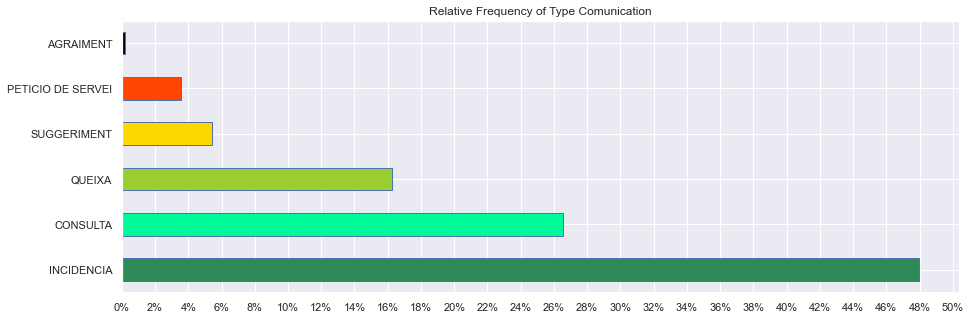

In [10]:
sb.set()

sorted_tipus = queixes['TIPUS'].value_counts(normalize=True).mul(100).sort_values(ascending=False)
pd.set_option('display.float_format', '{:.2f}%'.format)
print('----PERCENTATGE DE TIPUS------')
print(sorted_tipus, '\n')

#PREPARO EL PLOT
fig, ax = plt.subplots(figsize=(15,5))
ax = sorted_tipus.plot(kind='barh',
                       color=['seagreen', 'mediumspringgreen', 'yellowgreen', 'gold', 'orangered', 'black'],
                       edgecolor='b')

#FORMATEJO ELS TICKS A PERCENTS DE 5 EN 5
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.set(xticks=np.arange(0,52,2))
plt.title('Relative Frequency of Type Comunication')
plt.savefig('./tipus_queixes_percent.png')
plt.show(ax)


> Per a fer la mediana, la desviació estandar i la mitja. Aprofitarem p.ex la columna [MES_DATA_ALTA] i l'hi aplicarem el metode describe() per a que en ofereixi la informació.

In [11]:
pd.set_option('display.float_format', '{:.2f}'.format)
queixes.iloc[:,6].describe()


count   1042482.00
mean          6.47
std           3.44
min           1.00
25%           3.00
50%           7.00
75%           9.00
max          12.00
Name: MES_DATA_ALTA, dtype: float64

> per a fer el mode utilitzarem el metode mode()

In [12]:
queixes.iloc[:,6].mode()

0    7
dtype: int64

> Tenim :

- mean = 6,47 --> Mitjans de Juny
- median = 7 --> Juliol
- mode = 7 --> Juliol
- σ = 3,43 --> 3 mesos i mitj aprox. 


> Com podem comprovar, la mediana es troba al mes de Juliol, ja que es el percentil 50, la mitja  a meitats de Juny i el mode a Juliol també , a mes hi ha una σ = 3,4 mesos. Per tant:
    
               
1. Com la (median == mode) > mean average, això ens permet suposar que no ens trobem amb una distribució normal de dades i que la mostra te una "Positive Skew" es a dir hi ha més mostres concentrades a la primera meitat de l'any que no pas a la segona tot i que el mes més comú és el juliol, tal i com atestigua el mode().


2. Podem inferir doncs que la majoria de les comunicacións es donen entre els mesos de mitjans de MARÇ fins a mitjans OCTUBRE, es a dir una unitat de desviació estandar per damunt i per sota de la mitjana. Tot i que probablement el màxim nombre es concentrarà entre MARÇ I JULIOL. 

 
    
     
    

Text(0.5, 1.0, 'COMUNICACIONS PER MES')

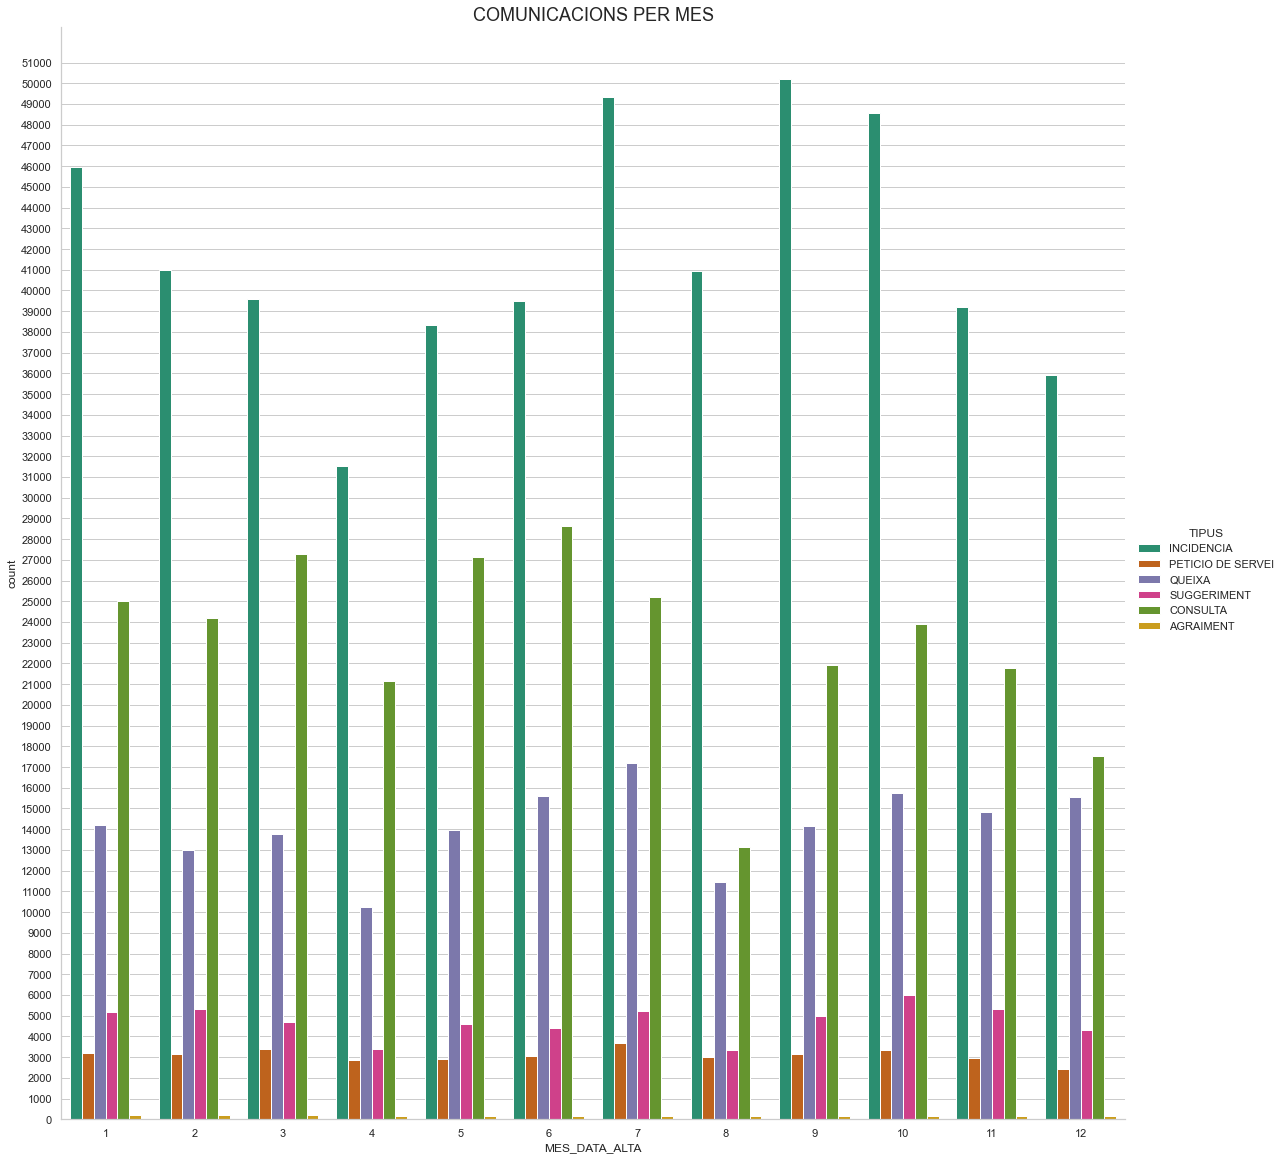

In [13]:
sb.set_style('whitegrid')
g = sb.catplot(x='MES_DATA_ALTA',
               hue='TIPUS',
               data=queixes,
               kind="count",
               palette='Dark2',
               height=16
              )
g.set(yticks=np.arange(0,52000,1000))
plt.title('COMUNICACIONS PER MES', size=18)

- Exercici 2

Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

> En aquest exercici (i els seguents), partirem de la hipotesis nul·la que:

- Els barris amb major renta per capita són els que realitzen més queixes. Per tant per a realitzar aquesta comparació ens basarem, \*com a referència, en l'estudi de 2018 LA RENDA DE LES LLARS A BARCELONA,DISTRIBUCIÓ PER DISTRICTES, BARRIS I SECCIONS CENSALS. *(només a nivell de referència ja que a partir del 2019 aquest estudi està discontinuat i per tant els marcs temporals d'ambdós datasets no corresponen.)* Entenem que la renda per càpita es una variable que tarda generacions en canviar, llavors d'una manera comparativa dins dels barris de barcelona segueix sent vàlida per a situar una divisió tant senzilla com zones amb mostres majoritàriament per sobre de la mitjana Vs zones blablabla per sota de la mtijana.


- Font: https://ajuntament.barcelona.cat/barcelonaeconomia/sites/default/files/LA%20RENDA%20DE%20LES%20LLARS_2018_juliol.pdf


- Mes enllà d'aprofundir en aquest estudi, només n'aprofitarem les conclusions alhora de situar els barris en una classe benestant o no, centrant-nos en la ordenació per renda que se'n fa al final d'aquest estudi (amb el gràfic aportat a sota) i d'una manera purament orientativa a la hora de suportar les hipotesis que aquí formularem.

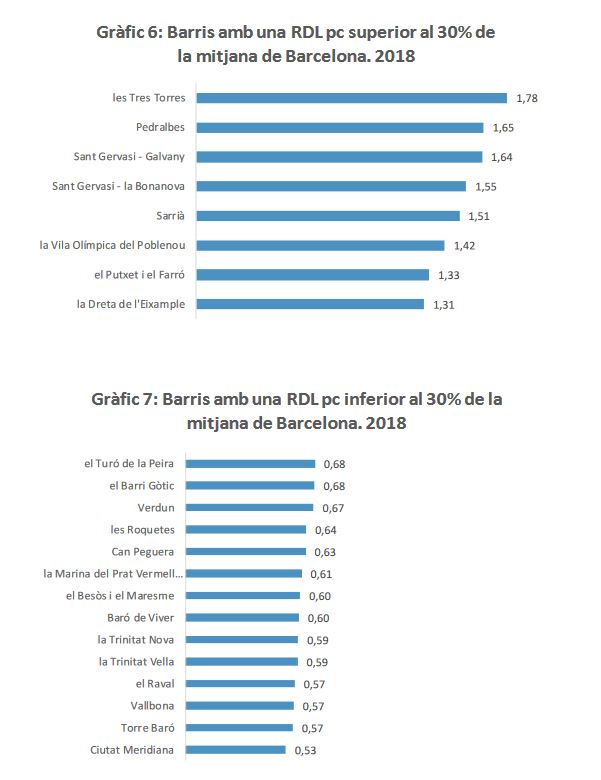

In [14]:
queixes_only = queixes[queixes['TIPUS']=='QUEIXA']
clean_queixes = queixes_only.filter(['DISTRICTE', 'BARRI', 'AREA'], axis=1)
clean_queixes


,DISTRICTE,BARRI,AREA
8,Sant Martí,el Besòs i el Maresme,Prevenció i seguretat
9,Sants-Montjuïc,Sants - Badal,Prevenció i seguretat
10,NaN,NaN,Prevenció i seguretat
12,Gràcia,el Coll,Prevenció i seguretat
15,NaN,NaN,Sanitat i salut pública
...,...,...,...
221188,NaN,NaN,Transports públics
221204,NaN,NaN,Oci / lleure
221206,NaN,NaN,Oci / lleure
221219,NaN,NaN,Oci / lleure


> Curiosament al especificar el tipus de queixa mes concretament ens trobem amb una dada important i es que ***es poden apreciar moltes queixes que no tenen un barri assignat (surt NaN)*** 
- Tenim 169.627 queixes en total


- Farem un dropna per a veure quin part de les queixes te especificat el Barri

In [15]:
clean_queixes.dropna()


,DISTRICTE,BARRI,AREA
8,Sant Martí,el Besòs i el Maresme,Prevenció i seguretat
9,Sants-Montjuïc,Sants - Badal,Prevenció i seguretat
12,Gràcia,el Coll,Prevenció i seguretat
84,Les Corts,la Maternitat i Sant Ramon,Prevenció i seguretat
90,Sarrià-Sant Gervasi,el Putxet i el Farró,Prevenció i seguretat
...,...,...,...
221063,Sant Andreu,la Trinitat Vella,Mobilitat
221066,Sant Andreu,Sant Andreu,Prevenció i seguretat
221142,Sant Andreu,la Sagrera,Prevenció i seguretat
221171,Sant Andreu,la Sagrera,Mobilitat


> Queden 87.553 , poc mes de la meitat de les que teniem inicialment

> Agrupem les dades per barri i fem un describe() per a tenir una impressió de les variables sel·leccionades en funció del barri, per tant ja tenim el count i el top de l'area per barri, que es traduiría en la preocupació dels ciutadans per al seu barri (els que es preocupen, clar...)

In [16]:
clean_queixes['DISTRICTE'] = clean_queixes['DISTRICTE'].str.replace('Sarrià - Sant Gervasi', 'Sarrià-Sant Gervasi')
clean_queixes.dropna(axis='columns')
p = clean_queixes.groupby(by='DISTRICTE')
p.describe()

BARRI                                               AREA  \
                     count unique                            top  freq  count   
DISTRICTE                                                                       
Ciutat Vella          7936      5                       el Raval  3082   7936   
Eixample             13159      6         la Dreta de l'Eixample  3053  13164   
Gràcia                6922      5              la Vila de Gràcia  3167   6923   
Horta-Guinardó        9816     11                    el Guinardó  2185   9819   
Les Corts             3286      3                      les Corts  1748   3287   
None                     0      0                            NaN   NaN     33   
Nou Barris            8015     13  Vilapicina i la Torre Llobeta  1244   8017   
Sant Andreu           8109      7                    Sant Andreu  3434   8110   
Sant Martí           13931     10                    el Poblenou  2372  13949   
Sants-Montjuïc        9664      8                   el Poble-sec  2476   9667   
Sarrià-Sant Gervasi   6715      7         Sant Gervasi - Galvany  1924   6718   

                                                                      
                    unique                                 top  freq  
DISTRICTE                                                             
Ciutat Vella             9               Prevenció i seguretat  3653  
Eixample                 9               Prevenció i seguretat  5128  
Gràcia                   9               Prevenció i seguretat  2661  
Horta-Guinardó           9  Recollida i neteja de l'espai urbà  3494  
Les Corts               10               Prevenció i seguretat  1405  
None                     5  Recollida i neteja de l'espai urbà    15  
Nou Barris              10  Recollida i neteja de l'espai urbà  3051  
Sant Andreu              9               Prevenció i seguretat  2522  
Sant Martí               9               Prevenció i seguretat  4975  
Sants-Montjuïc           9               Prevenció i seguretat  3827  
Sarrià-Sant Gervasi      9               Prevenció i seguretat  2198

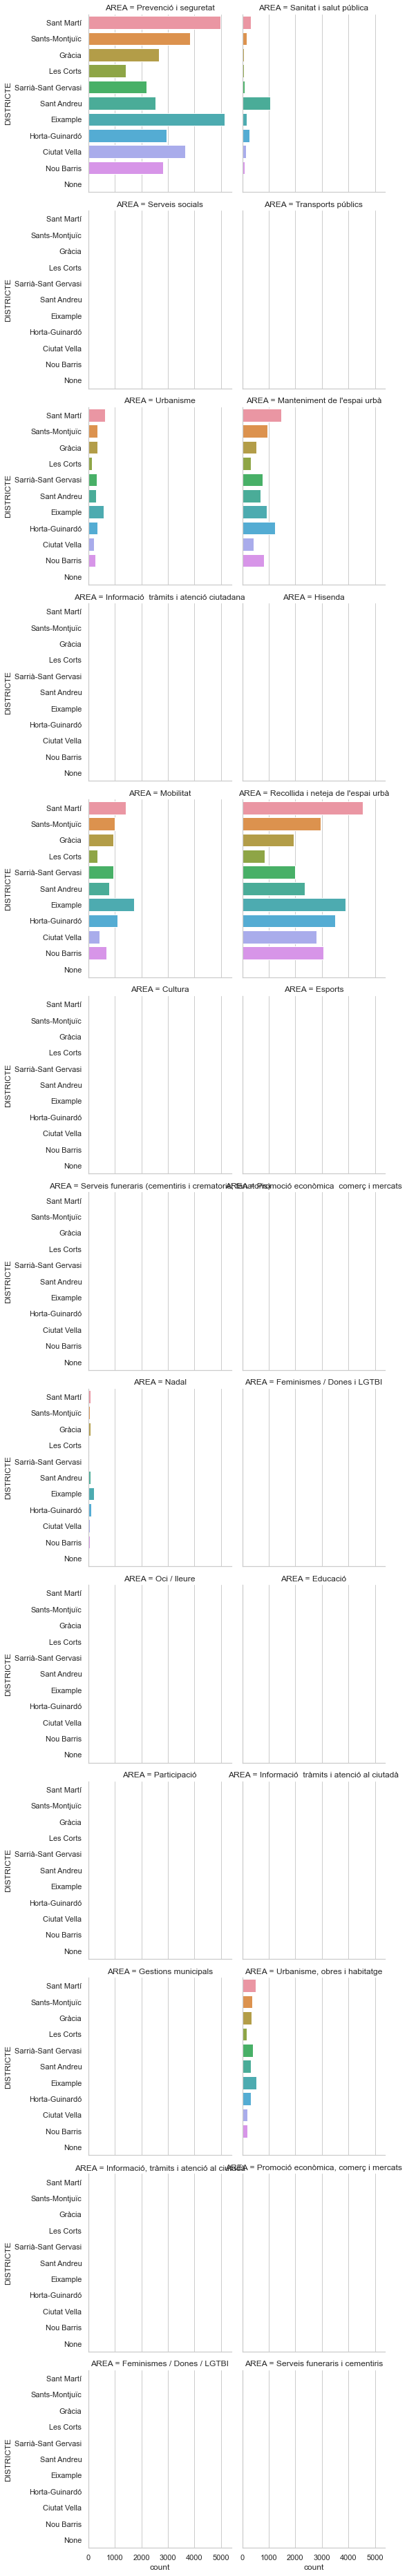

In [17]:
sb.set_style('whitegrid')
sb.catplot(y = 'DISTRICTE', data=clean_queixes, col = 'AREA', col_wrap = 2, kind = 'count',
          height=4);

> Queda llavors refutada la nostra hipòtesis nul·la, ja que: 

- No s'aprecia una majoria de queixes provinents dels barris amb una RDL pc superior al 30%. Més aviat al contrari, ja que aquests barris "Benestants" no destaquen precisament en cap area.


- El que destaca més es la acumulació de queixes relatives a seguretat i a recollida/neteja.


- Com a particularitat Sant Andreu destaca molt en queixes relatives a sanitat



> A partir d'aquí alterarem la matriu per a poder conformar una matriu de correlació:
- Transformarem alguns atributs a codis numèrics per a poder funcionar millor

- Farem un get dummies per a poder extendre els diferents subgrups dins de AREA

In [34]:


clean_queixes_dummy = pd.get_dummies(clean_queixes, columns=["AREA", 'DISTRICTE'])


q = clean_queixes_dummy.drop(columns='BARRI')

q.dropna()



,AREA_Cultura,AREA_Educació,AREA_Esports,AREA_Feminismes / Dones / LGTBI,AREA_Feminismes / Dones i LGTBI,AREA_Gestions municipals,AREA_Hisenda,AREA_Informació tràmits i atenció al ciutadà,AREA_Informació tràmits i atenció ciutadana,"AREA_Informació, tràmits i atenció al ciutadà",...,DISTRICTE_Eixample,DISTRICTE_Gràcia,DISTRICTE_Horta-Guinardó,DISTRICTE_Les Corts,DISTRICTE_None,DISTRICTE_Nou Barris,DISTRICTE_Sant Andreu,DISTRICTE_Sant Martí,DISTRICTE_Sants-Montjuïc,DISTRICTE_Sarrià-Sant Gervasi
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
221219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


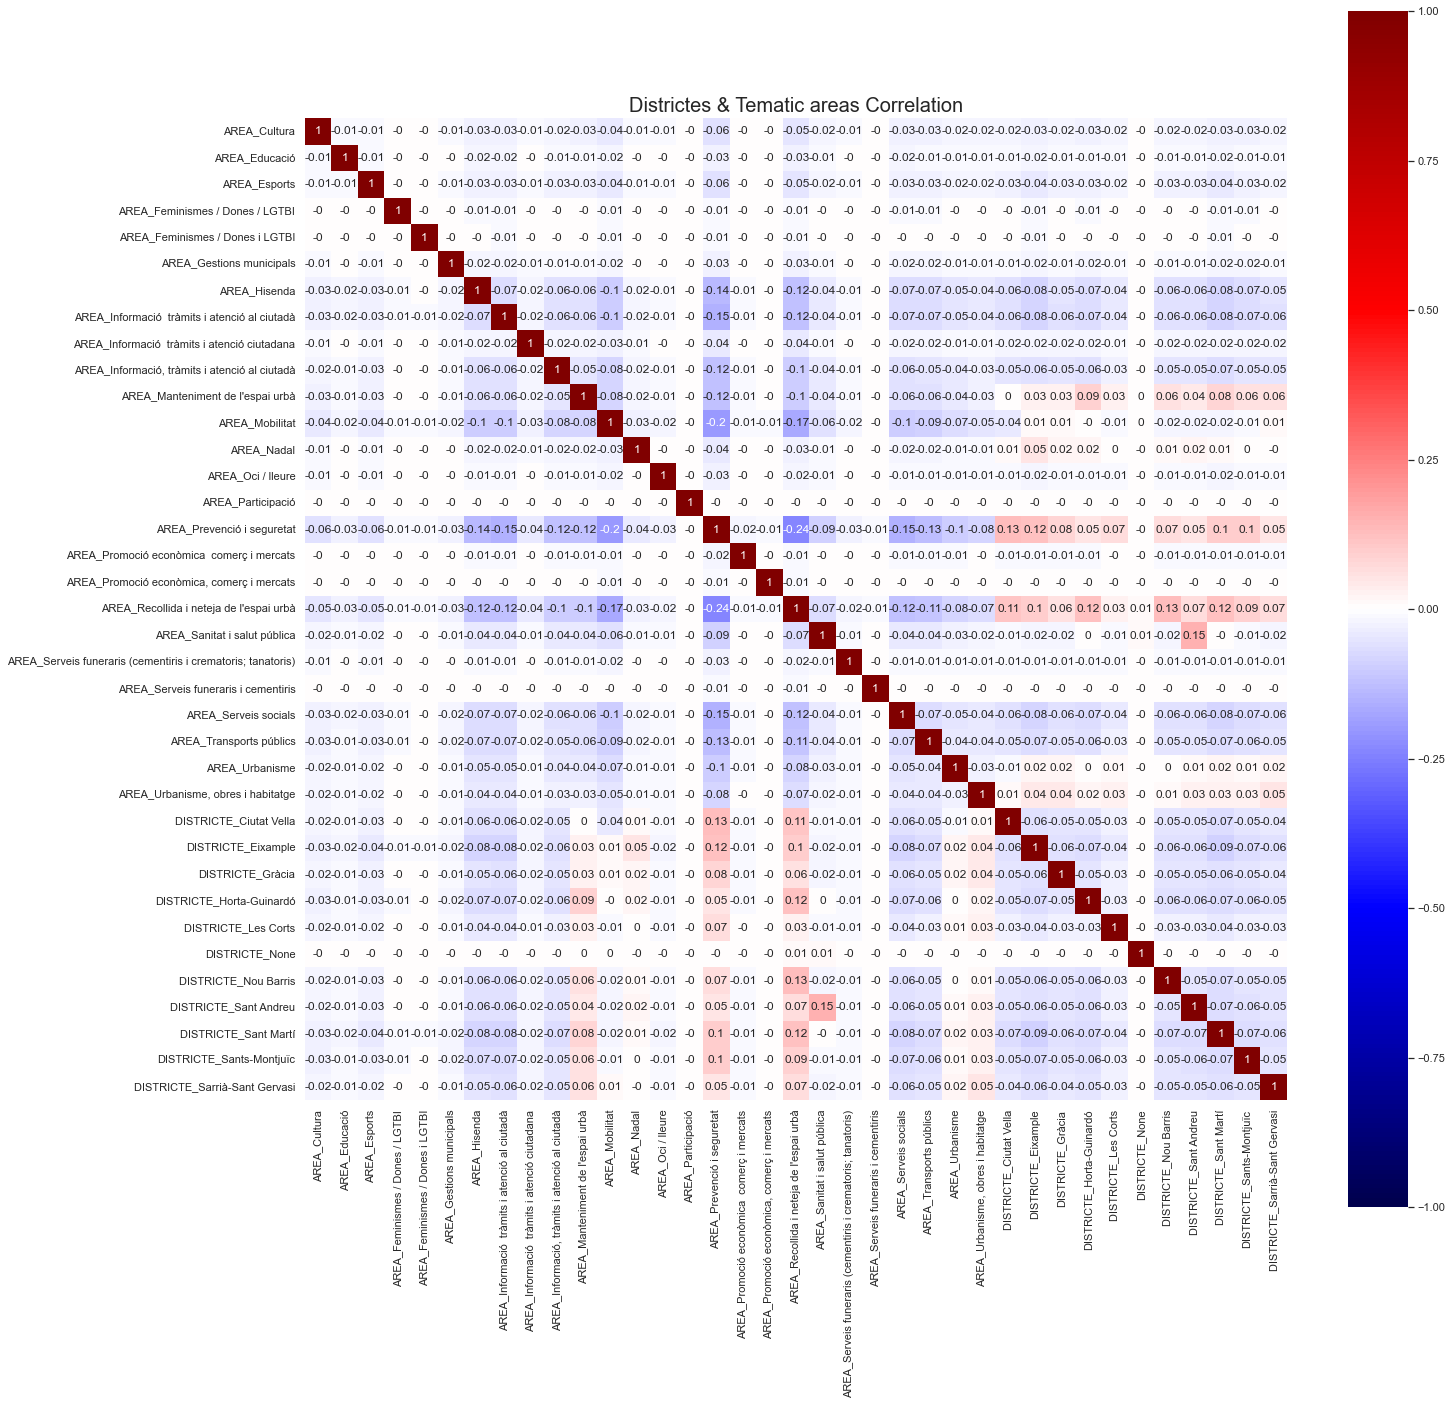

In [38]:
districtes_queixes_corr = round(q.corr(method = "pearson"),2)

fig, ax = plt.subplots(figsize=(22,22))
ax = sb.heatmap(districtes_queixes_corr,
                square = True,
                annot = True,
                vmin = -1,
                vmax = 1,
                center = 0,
                cmap = 'seismic',
                ax=ax )

plt.xticks(rotation= 90)
plt.title('Districtes & Tematic areas Correlation', size=20);

> Com es pot comprobar no hi ha cap tipus de correlació apreciable, entre els districtes i el area de la queixa, ja que el maxim valor que obtenim es -0,24.

> Tot i així s'aprecia una logica en la que (tal i com s'ha comprovat previament amb la distribució de comunicacions):
- Manteniment de l'espai urbà / Recollida i neteja de l'espai urbà / Prevenció i seguretat son els temes que contenen un volum mes elevat per norma general a tots els districtes.


## Nivell 2

- Exercici 3

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

## Nivell 3

- Exercici 4

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.